In [2]:
import rioxarray
import geopandas as gpd
import sys
sys.path.append("../..")


from  sage_one_tree_planted.data.climate_and_economic_justice_dataset import ClimateAndEconomicJusticeDataset
c = ClimateAndEconomicJusticeDataset()
c.fetch_data()

In [4]:
from shapely.geometry import Polygon


In [ ]:
# Load image and visualize
raster = rioxarray.open_rasterio('./usfs_carto_hi_2016/usfs_2016_hi_cartographic_20190911.img')
# Make shape file the same crs as raster image
usa_locations = gpd.read_file(c.shape_file/"usa.shp")
ha_locations = usa_locations[usa_locations.SF == "Hawaii"]
ha_locations  = ha_locations.to_crs(raster.rio.crs)

In [10]:
# define a polygon to crop
polygon_geom = ha_locations["geometry"].iloc[0]
# create a polygon gpd-df
polygon = gpd.GeoDataFrame(index=[0], crs=raster.rio.crs, geometry=[polygon_geom])
raster_clip_polygon = raster.rio.clip(polygon['geometry'], polygon.crs)

In [7]:
dir(raster_clip_polygon)

['LAYER_TYPE',
 'OVERVIEWS_ALGORITHM',
 'STATISTICS_EXCLUDEDVALUES',
 'STATISTICS_HISTOBINVALUES',
 'STATISTICS_HISTOMAX',
 'STATISTICS_HISTOMIN',
 'STATISTICS_HISTONUMBINS',
 'STATISTICS_MAXIMUM',
 'STATISTICS_MEAN',
 'STATISTICS_MEDIAN',
 'STATISTICS_MINIMUM',
 'STATISTICS_MODE',
 'STATISTICS_SKIPFACTORX',
 'STATISTICS_SKIPFACTORY',
 'STATISTICS_STDDEV',
 'T',
 '_HANDLED_TYPES',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__complex__',
 '__contains__',
 '__copy__',
 '__dask_graph__',
 '__dask_keys__',
 '__dask_layers__',
 '__dask_optimize__',
 '__dask_postcompute__',
 '__dask_postpersist__',
 '__dask_scheduler__',
 '__dask_tokenize__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__h

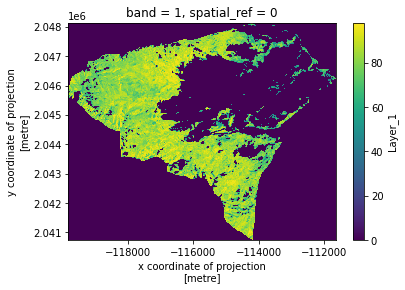

In [8]:
raster_clip_polygon.plot()

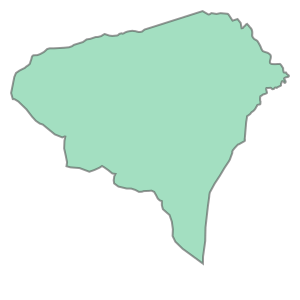

In [12]:
ha_locations["geometry"].iloc[0]

In [11]:
raster_clip_polygon.values.mean()

23.39716301500357

<AxesSubplot:>

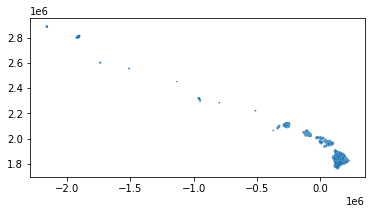

In [9]:
ha_locations.plot()